In [ ]:
Amellia Harmaimun Hidayah | 23083010034

Tugas EDA Missing Value, Outlier, dan Transformasi Data 

A083

## Import Data 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv (r'D:/tugas amell/SMT 3/ANALISIS DATA EKSPLORATIF/disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


## Missing Value 

### Mencari Missing Value 

In [10]:
np.sum(df.isnull())

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

### Mengatasi Missing Value

In [11]:
df['director'].fillna("Never-worked", inplace=True)
df['cast'].fillna("None", inplace=True)
df['country'].fillna(" None", inplace=True)
df['date_added'].fillna(" None", inplace=True)
df['rating'].fillna(" None", inplace=True)

In [7]:
np.sum(df.isnull())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Outlier 

### Mendeteksi Outlier


Mendeteksi outliers pada kolom: release_year
Batas Bawah: 1970.5, Batas Atas: 2046.5
Jumlah outliers di kolom release_year: 158
      release_year
198           1967
239           1956
270           1959
419           1952
466           1955
...            ...
1419          1963
1430          1968
1431          1938
1437          1963
1438          1965

[158 rows x 1 columns]


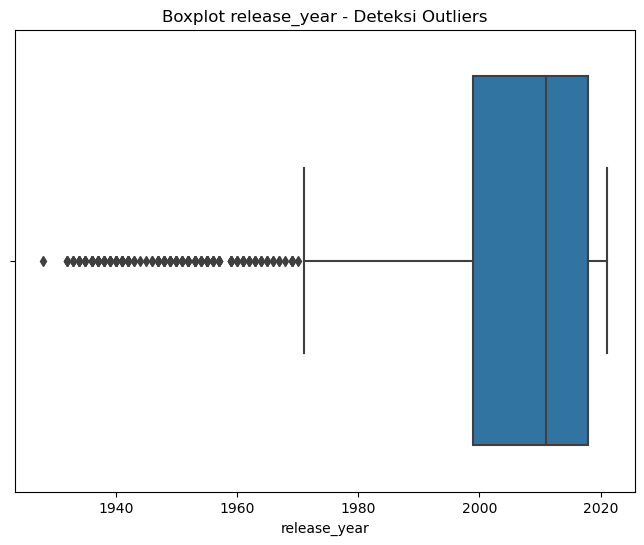

In [6]:
# Memilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop untuk mendeteksi outliers di setiap kolom numerik
for col in numerical_columns:
    print(f"\nMendeteksi outliers pada kolom: {col}")
    
    # Menghitung IQR dan batas bawah/atas
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Mendeteksi outliers
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]
    
    # Menampilkan batas bawah dan batas atas
    print(f"Batas Bawah: {batas_bawah}, Batas Atas: {batas_atas}")
    
    # Menampilkan jumlah outliers
    print(f"Jumlah outliers di kolom {col}: {outliers.shape[0]}")
    
    # Menampilkan outliers secara lengkap (opsional)
    if not outliers.empty:
        print(outliers[[col]])
    
    # Visualisasi boxplot untuk mendeteksi outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} - Deteksi Outliers')
    plt.xlabel(col)
    plt.show()

### Mengatasi Outlier

In [9]:
# Menghitung median release_year
median = df['release_year'].median()

# Mengganti outliers dengan median
df.loc[(df['release_year'] < batas_bawah) | (df['release_year'] > batas_atas), 'release_year'] = median

# Menampilkan data setelah penanganan outliers
print(df)

     show_id     type                                             title  \
0         s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1         s2    Movie                            Ernest Saves Christmas   
2         s3    Movie                      Ice Age: A Mammoth Christmas   
3         s4    Movie                        The Queen Family Singalong   
4         s5  TV Show                             The Beatles: Get Back   
...      ...      ...                                               ...   
1445   s1446    Movie                          X-Men Origins: Wolverine   
1446   s1447    Movie    Night at the Museum: Battle of the Smithsonian   
1447   s1448    Movie                                   Eddie the Eagle   
1448   s1449    Movie                              Bend It Like Beckham   
1449   s1450    Movie             Captain Sparky vs. The Flying Saucers   

                               director  \
0     Alonso Ramirez Ramos, Dave Wasson   
1            

## Transformasi Data 

### Melakukan Transformasi Data dengan Normalisasi

In [10]:
scaler = MinMaxScaler()
df['release_year_scaled'] = scaler.fit_transform(df[['release_year']])

print(df['release_year_scaled'])

0       0.90
1       0.34
2       0.80
3       1.00
4       1.00
        ... 
1445    0.76
1446    0.76
1447    0.90
1448    0.64
1449    0.82
Name: release_year_scaled, Length: 1450, dtype: float64


### Visualisasi Data Sebelum dan Sesudah

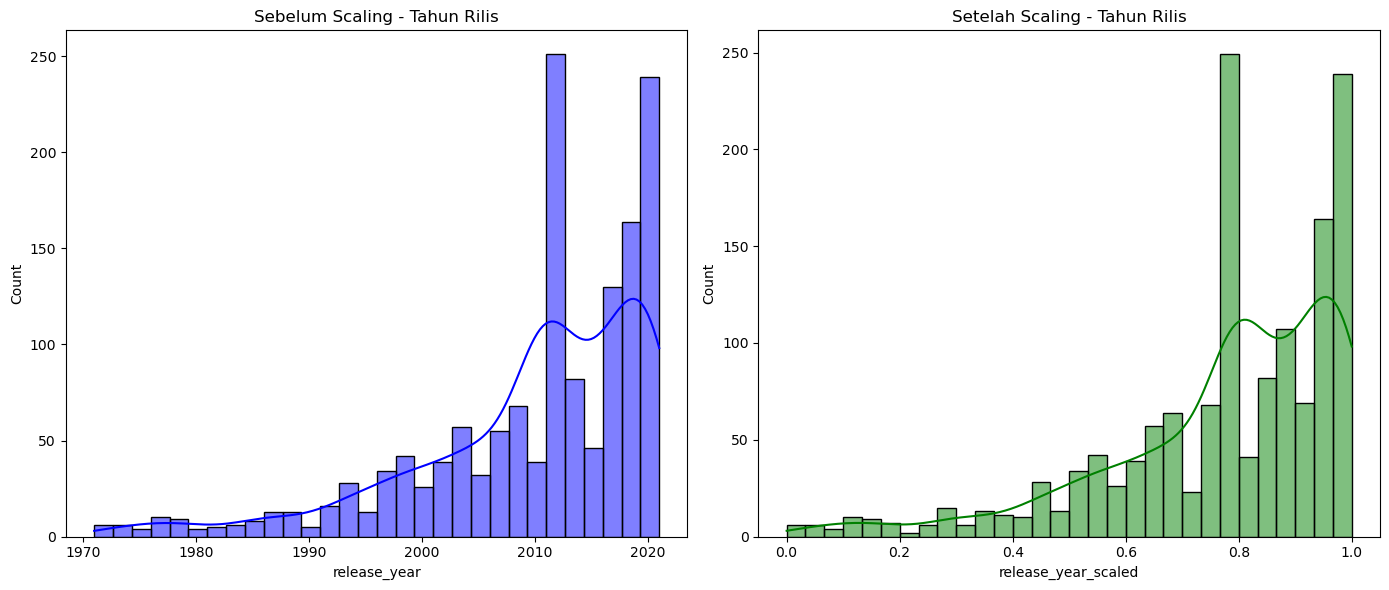

In [11]:
plt.figure(figsize=(14, 6))

# Visualisasi sebelum scaling
plt.subplot(1, 2, 1)
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Sebelum Scaling - Tahun Rilis')

# Visualisasi setelah scaling
plt.subplot(1, 2, 2)
sns.histplot(df['release_year_scaled'], bins=30, kde=True, color='green')
plt.title('Setelah Scaling - Tahun Rilis')

plt.tight_layout()
plt.show()

### Hasil Akhir

In [12]:
print(df.head())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                       Never-worked   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...           None   
1           Jim Varney, Noelle Parker, Douglas Seale           None   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough